<a href="https://colab.research.google.com/github/hanifnurf/TubesTKC_FlickrImage/blob/main/opencv_basic/arithmetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# untuk menjalankan & mengambil gambar, jalankan fungsi %ls
%cd /content/drive/My Drive/Colab Notebooks/TKC_Tubes/flickr30k_images/
#%ls   

/content/drive/My Drive/Colab Notebooks/TKC_Tubes/flickr30k_images


In [6]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [7]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [8]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "92246314.jpg"
}

In [9]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [10]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


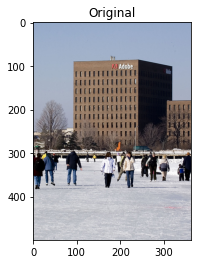

In [11]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

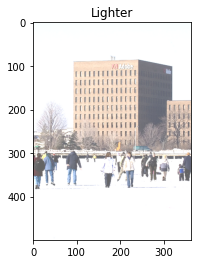

In [12]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

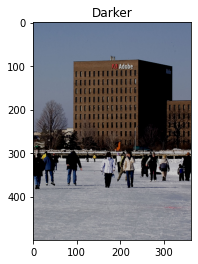

In [13]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)